In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.speedup import calculate_speedups

sns.set_theme()

## Read data

In [2]:
threads = 32

branches = ['no-jec-still-loads',
            'no-jec-no-early-returns-on-zero-sleepers']

our_df = None
master_df = None

for i in range(1, threads + 1):
    for branch in branches:
        filename = '07-07-2022/speedup-{}-{}-threads.csv'.format(branch, i)
        new_df = pd.read_csv(filename)
        new_df['threads'] = i
        new_df['branch'] = branch
        our_df = pd.concat([our_df, new_df], ignore_index = True)
        
    filename = '07-07-2022/speedup-master-{}-threads.csv'.format(i)
    new_master_df = pd.read_csv(filename)
    new_master_df['threads'] = i
    new_master_df['branch'] = 'master'
    master_df = pd.concat([master_df, new_master_df], ignore_index = True)

## Calculate speedups and prepare to plot

In [3]:
speedups_us = calculate_speedups(our_df)
speedups_us_df = pd.DataFrame(data=speedups_us)

speedups_master = calculate_speedups(master_df)
speedups_master_df = pd.DataFrame(data=speedups_master)

df = pd.concat([speedups_us_df, speedups_master_df], ignore_index = True)

## Plot fixed frequency speedups

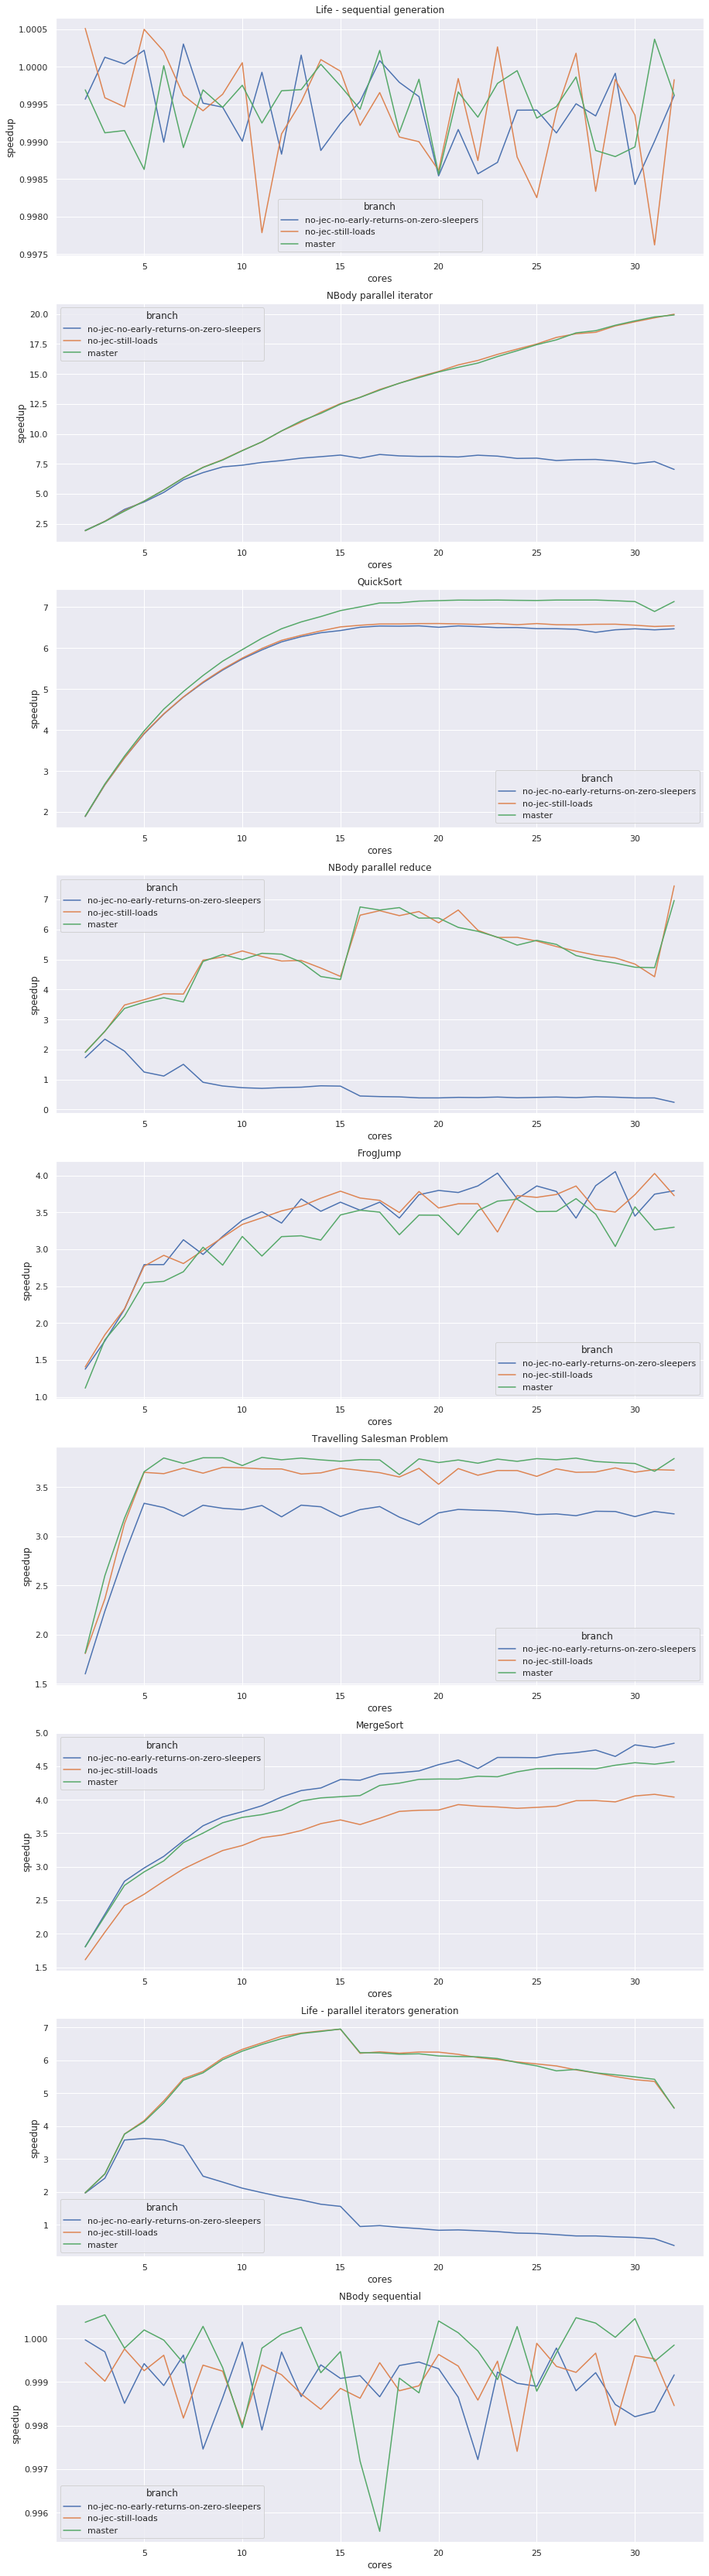

In [4]:
algorithms = set(df['name'])

fig, axs = plt.subplots(len(algorithms), figsize=(15, 60))

for i, algorithm in enumerate(algorithms):
    algorithm_df = df[df['name'] == algorithm]
    
    sns.lineplot(x='cores', y='speedup', hue='branch', data=algorithm_df, ax=axs[i]);
    axs[i].set_title(algorithm);    

## Conclusion

no-jec-still-loads: the jec is not used to anything, but since it is stored in the same word of the sleeping threads counter, it is still loaded to avoid trying to wakeup threads when there aren't sleepers.

no-jec-no-early-returns-on-zero-sleepers: the jec is not used and the atomic counter is not loaded when new jobs are posted.